In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Pro_Solvers.pro_solvers import solve_heat
from My_Solvers.pde_solvers import fdm
plt.rcParams["figure.figsize"] = (5, 3)  # width x height in inches
from matplotlib.animation import FuncAnimation
import time
from scipy.interpolate import interp1d
#from manim import *
#from manim.utils.ipython_magic import ManimMagic
#get_ipython().register_magics(ManimMagic)

#%load_ext manim

In [8]:
# PDE: u_t = alpha u_xx
alpha = 1
L = 1.0
dx = 0.01
dt = 0.0001
t_end = 1000 * 0.001  # Try varying this

# Initial condition: sin(3 pi x)
#u0 = lambda x: np.sin(3 * np.pi * x) + 1
#u0 = lambda x: x**2
#u0 = lambda x : np.where(np.sin(100*x) > 0.0, 1.0, 0.0)
#u0 = lambda x: np.where(np.abs(x) < .1, 100.0, 0.0)

N = 100
C = np.random.rand(N)
def u0(x):
    u = 0
    k = 0
    while k < N:
        u += C[k]*np.cos((k+1) * np.pi * x) / (k+1)
        k += 1
    return u + 1

G = np.random.rand(N)
GN = 10
def g(x, t):
    u = 0
    k = 0
    while k < GN:
        u += G[k]*np.cos((k+1) * np.pi * x) / (k+1)
        k += 1
    return u + 1

#u0 = lambda x: 10*np.exp(-100*(x-.5)**2)
# Exact solution
#def u_exact(x, t):
#    return np.exp(-18 * np.pi**2 * t) * np.sin(3 * np.pi * x)

def u_exact(x, t):
    u = np.zeros_like(x)  # initialize with same shape as x
    k = 0
    while k < N:
        term = C[k] * np.exp(-(k+1)**2 * np.pi**2 * t * alpha) * np.cos((k+1) * np.pi * x) / (k+1)
        u += term
        k += 1
    return u + 1


tick = time.time()
T, U = solve_heat(u0, alpha, dx, t_end, L, convec = 0, leftval = 0, rightval = 0)#, g = lambda x,t: (t**2)*np.cos(x))
tock = time.time()
ft = tock - tick
print(f"first part done in {ft} seconds")
T1, X1, U1 = fdm(u0, alpha, dx, t_end, L, convec = 0, lbc = [1,0,0], rbc = [1,0,0])#, g = lambda x,t: (t**2)*np.cos(x))
tick = time.time()
print(f"second part done in {tick - tock} seconds")
print(f"ratio is {ft / (tick - tock)}")

first part done in 9600.010499715805 seconds
second part done in 66.05398631095886 seconds
ratio is 145.3358235568455


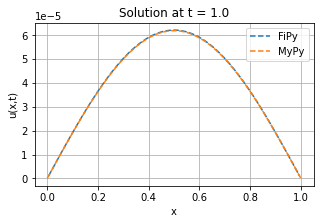

In [9]:
x = np.linspace(dx/2, L - dx/2, int(L/dx))  # FiPy's cell centers

#plt.plot(x, U[0], label='Initial')
plt.plot(x, U[-1], '--', label=f'FiPy')
plt.plot(X1, U1[-1], '--', label='MyPy')
#plt.plot(X1, u_exact(X1,t_end), '--', label="Exact")


plt.title(f"Solution at t = {t_end}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from matplotlib.animation import FuncAnimation
U = U1
x = X1

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(-1.1, np.max(U) + .1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Heat Equation Animation")

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    line.set_data(x, U[frame])
    ax.set_title(f"t = {T[frame]:.4f}")
    return (line,)

ani = FuncAnimation(fig, update, frames=len(T), init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [23]:
dx * (np.sum(U[-1]) - np.sum(U1[-1])) /dx*np.sum(U[-1])

-4.599054657753657

In [22]:
dx*np.sum(U[-1])

0.8696705014067267

In [6]:
X1.shape

(101,)

In [30]:
X = np.arange(dx/2, L, dx)
X.shape

(100,)

In [31]:
X1[-1]

1.0

In [32]:
X[-1]

0.9949999999999999

In [33]:
U.shape

(46, 100)

In [42]:
inU = interp1d(X, U[-1], kind='cubic', fill_value = "extrapolate")
U = inU(X1)

In [45]:
dx*np.sum((U1[-1] - U)**2)

8.674705768181816e-06

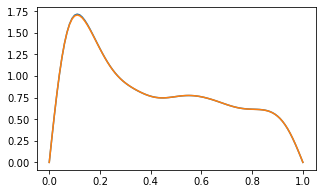

In [47]:
plt.plot(X1, U1[-1])
plt.plot(X1, U)